# Matplotlib

In [6]:
import matplotlib.pyplot as plt

# Exercise on Numpy and Matplotlib

The data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with ```np.loadtxt``` and do the following exercises **without for-loops**.

In [8]:
data = np.loadtxt("http://scipy-lectures.org/_downloads/populations.txt")
name = ['hare', 'lynx', 'carrot']


Plot the populations for the years in the period. Add legend and axis labels to the plot.

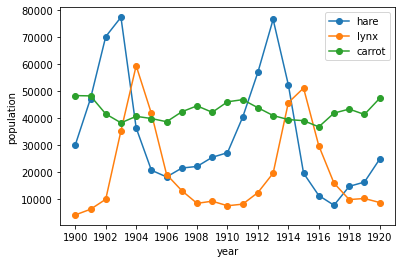

In [9]:
import matplotlib.pyplot as plt
plt.plot(data[:,0], data[:,1], '-o', label='hare')
plt.plot(data[:,0], data[:,2], '-o', label='lynx')
plt.plot(data[:,0], data[:,3], '-o', label='carrot')
plt.xlabel('year')
plt.xticks(data[:,0][::2])
plt.ylabel('population')
plt.legend()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

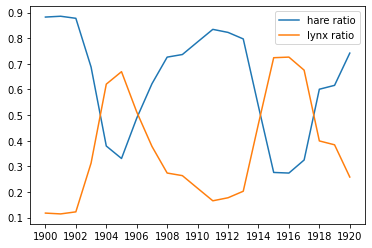

In [10]:
plt.plot(data[:,0], data[:,1] / (data[:,1] + data[:,2]), label='hare ratio')
plt.plot(data[:,0], data[:,2] / (data[:,1] + data[:,2]), label='lynx ratio')
plt.xticks(data[:,0][::2])
plt.legend()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

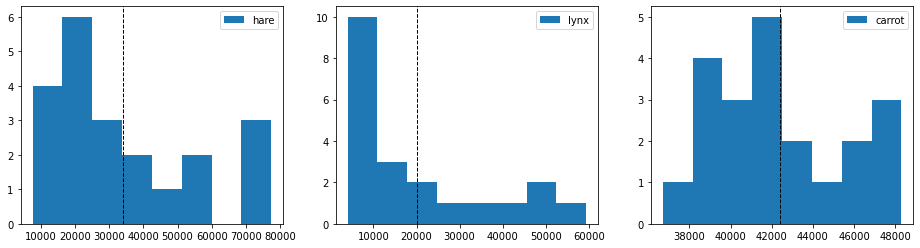

In [11]:
fix, ax = plt.subplots(1, 3, figsize=(16,4))
for i in range(3):
  ax[i].hist(data[:,i + 1], bins=8, label=name[i])
  ax[i].axvline(data[:,i + 1].mean(), color='k', linestyle='dashed', linewidth=1)
  ax[i].legend()

Find which year each species had the largest population. Mark these years in the plot of populations.

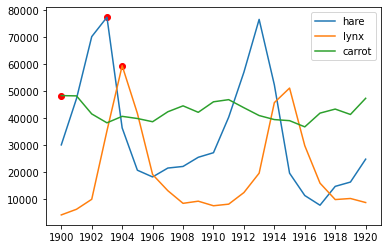

In [12]:
from matplotlib import rcParams
max_idx = np.argmax(data[:,1:], axis=0)
for i in range(3):
  plt.scatter(data[max_idx[i],0], data[max_idx[i], i + 1], c='r', marker = '.', s=rcParams['lines.markersize'] ** 2 * 4)
  plt.plot(data[:,0], data[:,i + 1], '-', label=name[i])
plt.xticks(data[:,0][::2])
plt.legend()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

([<matplotlib.patches.Wedge at 0x21929b960a0>,
 [Text(-0.6858388280562522, 0.8600145940217683, 'hare'),
  Text(0.6858389085766268, -0.8600145298088989, 'lynx')])

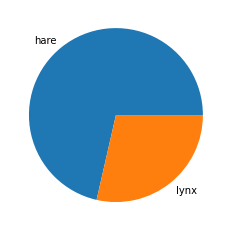

In [13]:
names = ['hare', 'lynx', 'carrot']
max_pie = (data[:,1:3] == data[:,1:3].max(axis=1).reshape(-1, 1)).sum(0)
plt.pie(max_pie, labels=names[:2])

Find which years any of the populations is above 50000. Show time periods where populations are above 50000
in the plot of populations.

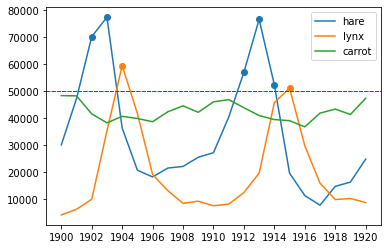

In [14]:
more_50 = data[:,1:] > 50000
for i in range(3):
  plt.scatter(data[more_50[:,i],0], data[more_50[:,i],i + 1])
  plt.plot(data[:,0], data[:,i + 1], '-', label=name[i])
  plt.axhline(50000, color='r', linestyle='dashed', linewidth=1)
plt.xticks(data[:,0][::2])
plt.legend()

Find the top 2 years for each species when they had the lowest populations.

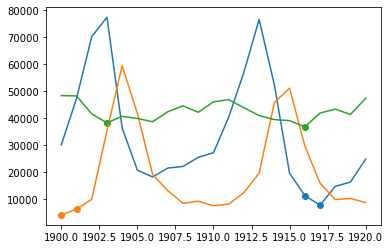

In [15]:
top2min = data[:,1:] <= (np.partition(data[:,1:], 2, axis=0)[2 - 1]).reshape([1,3])
for i in range(3):
  plt.plot(data[:,0], data[:,i + 1], '-', label=name[i])
  plt.scatter(data[top2min[:,i],0], data[top2min[:,i],i + 1])

Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

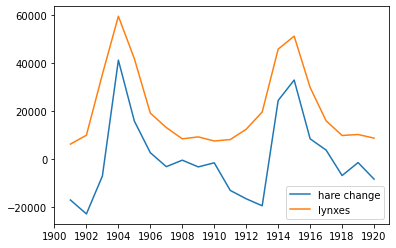

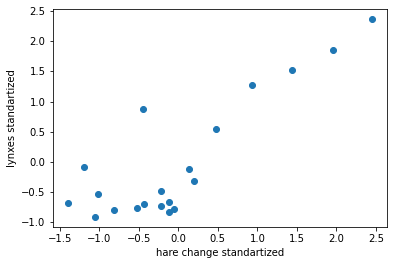

array([[1.        , 0.84948016],
       [0.84948016, 1.        ]])

In [16]:
from scipy.ndimage.interpolation import shift
hare_change = shift(data[:,1], 1)[1:] - data[1:,1]
plt.plot(data[1:,0], hare_change, '-', label='hare change')
plt.plot(data[1:,0], data[1:,2], label='lynxes')
plt.legend()
plt.xticks(data[:,0][::2])
plt.show()
plt.scatter((hare_change - hare_change.mean()) / hare_change.std(), (data[1:,2] - data[1:,2].mean()) /  data[1:,2].std())
plt.xlabel('hare change standartized')
plt.ylabel('lynxes standartized')
plt.show()
np.corrcoef(hare_change, data[1:,2])

Show population of hares vs carrots and hares vs lynxes.

In [17]:
# не понял

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

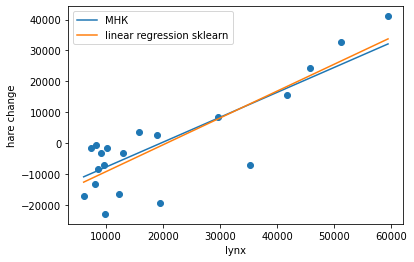

diff between estimated and real hare change from 1919 to 1920 is ~ -444


In [18]:
# метод наименьших квадратов
lynx = data[1:,2]
hare = hare_change
n = len(data)
a = (n * (lynx * hare).sum() - lynx.sum() * hare.sum()) / (n * (lynx ** 2).sum() - (lynx.sum()) ** 2)
b = (hare.sum() - a * lynx.sum()) / n
plt.scatter(lynx, hare)
x = np.array([lynx.min(), lynx.max()])
y = a * x + b
plt.plot(x, y, '-', label=u'МНК')
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(lynx.reshape(-1, 1), hare.reshape(-1, 1))
plt.plot(x, linear.predict(x.reshape(-1, 1)).reshape(-1), label='linear regression sklearn')
plt.legend()
plt.xlabel('lynx')
plt.ylabel('hare change')
plt.show()

hare_change_1920_mnk = a * lynx[-1] + b
print("diff between estimated and real hare change from 1919 to 1920 is ~ %.f" % (hare_change_1920_mnk - hare[-1]))

## High-dimentional data visualization

What is an image?

![img](https://mymodernmet.com/wp/wp-content/uploads/2017/08/monovision-awards-bw-series-of-the-year-2017-02.jpg)

Basically, it is an array of numbers:

In [19]:
from PIL import Image
import requests
from io import BytesIO

url = 'https://mymodernmet.com/wp/wp-content/uploads/2017/08/monovision-awards-bw-series-of-the-year-2017-02.jpg'

response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')
print(np.array(img).shape)
np.array(img)

(500, 750)


array([[145, 145, 144, ..., 142, 143, 144],
       [146, 146, 146, ..., 141, 143, 144],
       [146, 147, 146, ..., 140, 142, 143],
       ...,
       [114, 111, 120, ...,  78,  69,  56],
       [ 75,  83, 104, ...,  53,  51,  64],
       [ 63,  82, 108, ..., 101,  95,  94]], dtype=uint8)

What if we take a random point in a 500*750 dimentional space? Will it be a meaningful image?

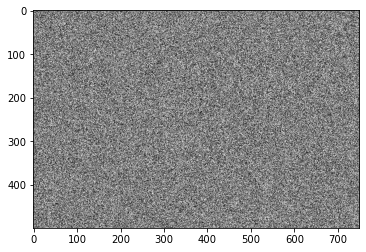

In [20]:
sample_img = np.random.choice(np.arange(256), size=500*750).reshape(500, 750)
plt.imshow(sample_img, cmap='gray')
plt.show()

Meaningful images are very rare subset (manifold?) in a space of all possible images. Can we explore a structure of this subset?

Get the MNIST dataset:

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [22]:
images = digits.data.reshape(-1, 8, 8)

Look at some items in the dataset:

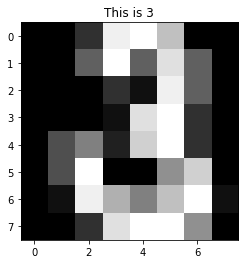

In [23]:
i = 985
plt.imshow(images[i], cmap='gray')
plt.title('This is {}'.format(digits.target[i]))
plt.show()

In [24]:
from sklearn.decomposition import PCA
n_components=50
pca = PCA(n_components=n_components)

X_transformed = pca.fit_transform(digits.data.astype(float))
X_transformed.shape

(1797, 50)

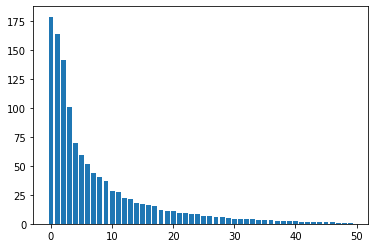

In [25]:
plt.bar(np.arange(n_components), pca.explained_variance_)
plt.show()

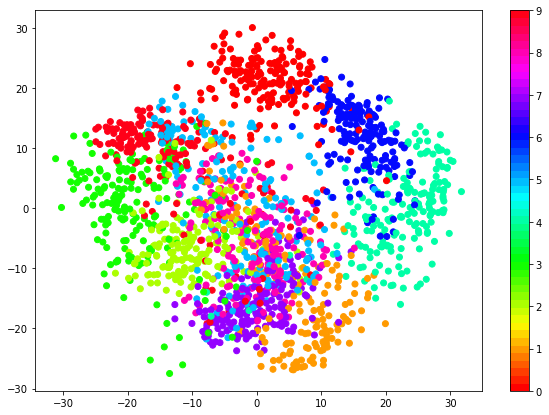

In [26]:
plt.figure(figsize=(10, 7))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=digits.target.astype(int), 
            cmap=plt.cm.get_cmap('hsv', n_components))
plt.colorbar()
plt.show()

In [27]:
pca.components_.shape, pca.mean_.shape

((50, 64), (64,))

In [28]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*X_transformed.T[:3], c=digits.target, cmap='hsv')
plt.show()

<IPython.core.display.Javascript object>

In [29]:
X_restored = pca.inverse_transform(X_transformed)
X_restored.shape

(1797, 64)

In [30]:
pca.singular_values_

array([567.0065665 , 542.25185421, 504.63059421, 426.11767608,
       353.3350328 , 325.82036569, 305.26158002, 281.16033073,
       269.06978193, 257.82395143, 226.31879719, 221.5148324 ,
       198.33071545, 195.70013887, 177.9762712 , 174.46079067,
       168.72787641, 164.15849219, 148.23330876, 139.83132462,
       138.58443271, 131.1882069 , 128.72691665, 124.93159016,
       122.57503405, 113.44487728, 111.48027133, 105.46348813,
       102.80780243,  96.22856616,  89.81296469,  87.33494649,
        85.25960437,  84.15671337,  81.58936529,  79.64200462,
        74.43047136,  70.12195688,  69.27559227,  67.56406817,
        64.03315896,  58.52697795,  57.12818557,  55.09243185,
        50.17909986,  48.1749428 ,  45.62286487,  40.89585718,
        34.68503519,  29.5461187 ])

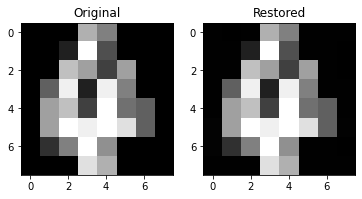

0.999547114023479

In [35]:
%matplotlib inline
i = 540
fig, ax = plt.subplots(1, 2)
ax[0].imshow(digits.images[i], cmap='gray')
ax[1].imshow(X_restored[i].reshape(8, 8), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()
pca.explained_variance_ratio_.sum()

Can you perform inverse transoformation explicitly?

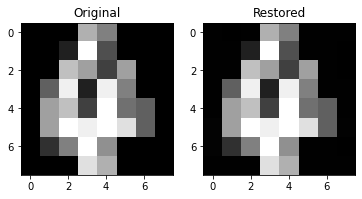

In [32]:
res = np.dot(X_transformed, pca.components_) + digits.data.mean(0)

i = 540
fig, ax = plt.subplots(1, 2)
ax[0].imshow(digits.images[i], cmap='gray')
ax[1].imshow(res[i].reshape(8, 8), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()

In [37]:
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('mnist_784')

[82.53841935 88.32943912 91.45734578 93.44328077 94.81951956 95.82528123
 96.61672346 97.25527    97.78506456 98.22964943 98.60463831 98.91926304
 99.18448847 99.40471556 99.57955249]


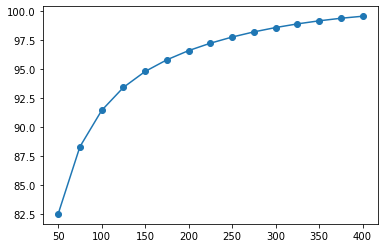

In [46]:
var_list = []
comp_range = np.arange(50, 401, 25)
for i in comp_range:
  pca = PCA(n_components=i)
  X_transformed = pca.fit_transform(mnist_data.data.astype(float)) 
  var_list.append(pca.explained_variance_ratio_.sum())
var_list = np.asarray(var_list) * 100
print(var_list)
plt.plot(comp_range, var_list, '-o')
plt.show()

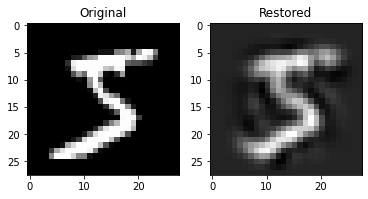

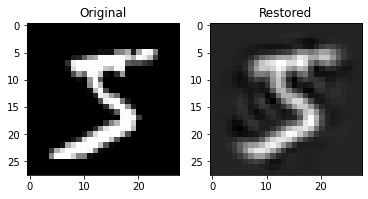

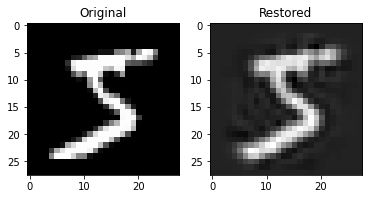

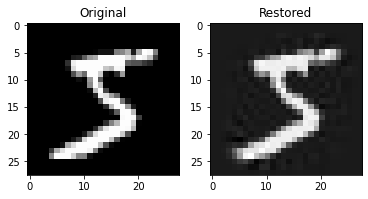

[0.8507847809108815, 0.900116292312823, 0.9500219988344369, 0.9906368855909479]

In [61]:
comp_act = [59, 87, 154, 338]
comp_var_list = []
mnist_digits = mnist_data.data.astype(float)
for i in comp_act:
  pca = PCA(n_components=i)
  X_transformed = pca.fit_transform(mnist_digits)
  X_restored = pca.inverse_transform(X_transformed[0])
  comp_var_list.append(pca.explained_variance_ratio_.sum())
  fix, ax = plt.subplots(1, 2)
  ax[0].imshow(mnist_digits[0].reshape(28, 28), cmap='gray')
  ax[1].imshow(X_restored.reshape(28, 28), cmap='gray')
  ax[0].set_title('Original')
  ax[1].set_title('Restored')
  plt.show()
comp_var_list

Homework:

1. Complete all exersices with Lynx-Rabbits dataset.
2. Plot a graph of total explained variance vs number of principal components.
3. Find a number of principal components for 99%, 95%, 90%, and 85% of explained variance.
4. Plot an original image and restored images from 99%, 95%, 90%, and 85% of explained variance.
    
    Hint: download full-size 28x28 MNIST images to better see a difference between original and restored images

```python
from sklearn.datasets import fetch_openml
digits = fetch_openml('mnist_784')
```

![img](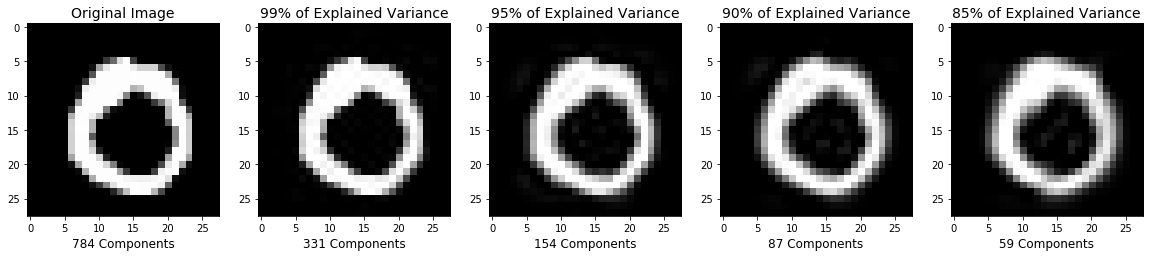%0A)

5*. Can you get a more insightful representation of MNIST dataset in 2D? For inspiration see https://colah.github.io/posts/2014-10-Visualizing-MNIST/